In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
# from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score , StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.pipeline import Pipeline
import warnings
warnings. filterwarnings('ignore')
import datetime as dt
import joblib

# pd.pandas.set_option('display.max_columns', None)


In [ ]:
credit_card_data = pd.read_csv("creditcard.csv")

credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


__Exploring the data and cleaning along__

In [ ]:
# checking the shape of the data

credit_card_data.shape

(284807, 31)

In [ ]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
credit_card_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
# checking for missing values

credit_card_data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

No null values in the data. I also confirmed columns like 'V25', 'V26' which are hidden in the output above.

In [ ]:
# checking for duplicates

credit_card_data.duplicated().sum()

1081

There are duplicate records in the data

In [ ]:
# let's drop duplicate records

credit_card_data.drop_duplicates(inplace=True)

# check for duplicates again
credit_card_data.duplicated().sum()

0

In [ ]:
# let's see summary statistics

credit_card_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [ ]:
#Checking how the classes are represented

credit_card_data.groupby("Class")[["Class"]].count().rename({"Class": "number of records"}, axis = 1)

,number of records
Class,
0,283253
1,473


We see that there's class imbalance. However, this is typical of such scenarios in real life, in which there are usually more non-suspicious than suspicious transaction activities. If we cannot get more data for the minority class, we leave the data as-is and not try to address the imbalance issue.

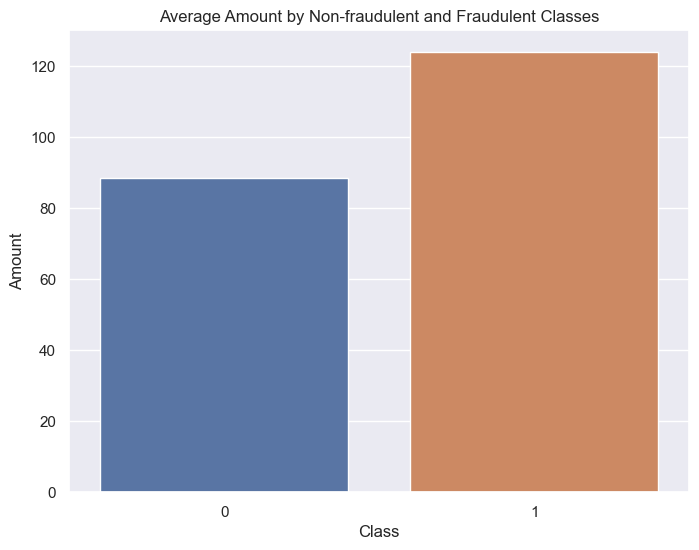

In [ ]:
# more exploration; let's look at the amount by class

sns.set_theme(rc={'figure.figsize':(8,6)})
sns.barplot(data = credit_card_data.groupby("Class")["Amount"].mean().reset_index(), x = "Class", y = "Amount")
plt.title("Average Amount by Non-fraudulent and Fraudulent Classes", fontsize = 12)
plt.show()

We can see already that, on average, the amount transacted in fraudulent instances are more than that transacted on normal or non-fraudulent instances. This could mean that higher transaction amounts could be an indication that a transaction is fraudulent- i.e, fraudulent transactions are characterized by higher amounts.

We really do not know what v1 to v28 mean, as, because this is sensitive data, they were encoded. so, exploring the data further is a bit challenging.

Now, let's move on to checking if there are any additional features we can create from existing features or, if there is even a need for this.

__Feature Engineering__

There are no feature engineering needs observed.

__Model development__

All features and the target are already in numeric form so, no need for encoding. So, moving on to splitting the data and training the model

In [ ]:
# splitting into training and testing data.

train_dataset = credit_card_data.sample(frac=0.8, random_state=0)
test_dataset = credit_card_data.drop(train_dataset.index)

In [ ]:
# separating into feature and target

X_train, y_train = train_dataset.drop("Class", axis=1), train_dataset["Class"]
X_test, y_test = test_dataset.drop("Class", axis=1), test_dataset["Class"]


In [ ]:
# [17 14 12 10 16 11  9  7 18  4]

# {
#   "imput1": 2.288644,
#   "imput2": 0.325574,
#   "imput3": -0.270953,
#   "imput4": -0.838587,
#   "imput5": -0.414575,
#   "imput6": -0.503141,
#   "imput7": -1.692029,
#   "imput8": 0.66678,
#   "imput9": 0.599717,
#   "imput10": 1.725321
# }

In [ ]:
# Will first train a baseline model- using the usual train_test_split cross-validation.
# let's try a number of alorigthms

# Instantiating the algorithms

lg_model = LogisticRegression(multi_class = "multinomial", random_state = 42)
ds_model = DecisionTreeClassifier(random_state = 42)
rf_model = RandomForestClassifier(random_state= 42)
sv_model = SVC(random_state = 42)
lsv_model = LinearSVC(dual = False, random_state=42)
xg_model = XGBClassifier(random_state = 42)
# cb_model = clf = CatBoostClassifier(iterations=5, learning_rate=0.1)
ad_model = AdaBoostClassifier(random_state = 42)
lgm_model = LGBMClassifier(random_state = 42)
kn_model = KNeighborsClassifier()
nb_model = GaussianNB()

In [ ]:
models = {"Logistic_regression": lg_model,
          "Decision_trees": ds_model,
          "Random_forest": rf_model,
          "Support_vector": sv_model,
          "Linear_support_vector": lsv_model,
          "Xgboost": xg_model,
          "Adaboost": ad_model,
          "LGBM": lgm_model,
          "KNN": kn_model,
          "Naive_bayes": nb_model
          }

In [ ]:
# Will be using a pipeline so, instantiating the scaler too so I can add this to the pipeline-
# MinMax scaler because I am also trying out algorithms that use the gradiant descent- e.g., Logistic regression.
# Also, Algorithms like random forest don't care whether you scale your data or not so, for them, it doesn't matter what scaler you use.

scaler = MinMaxScaler()


In [ ]:
# function to evaluate the models from the algorithms

# check precision, recall and f1_score

print(f"evaluation started at {dt.datetime.now()}")
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', scaler),
        ('model', model)
        ])
    pipeline.fit(X_train, y_train)
    train_score = pipeline.score(X_train, y_train)
    print(f"The training score for {name} is {train_score}, \n")
    test_score = pipeline.score(X_test, y_test)
    print(f"The testing score for {name} is {test_score}", "\n")
    y_pred = pipeline.predict(X_test)
    print("classification_report: ", "\n", classification_report(y_test, y_pred), '\n')
    confusion_matrix = pd.crosstab(y_test, y_pred)
    print(name, "\n", confusion_matrix, "\n")
    print("------------------------", "\n")
print(f"evaluation ended at {dt.datetime.now()}")

evaluation started at 2023-09-29 14:18:37.552942
The training score for Logistic_regression is 0.9991453029108163, 

The testing score for Logistic_regression is 0.9990483743061063 

classification_report:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56634
           1       0.87      0.60      0.71       111

    accuracy                           1.00     56745
   macro avg       0.93      0.80      0.86     56745
weighted avg       1.00      1.00      1.00     56745
 

Logistic_regression 
 col_0      0   1
Class           
0      56624  10
1         44  67 

------------------------ 

The training score for Decision_trees is 1.0, 

The testing score for Decision_trees is 0.9991717331923518 

classification_report:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56634
           1       0.78      0.80      0.79       111

    accuracy                           1.00 

- A good number of the models are doing well.
- The Naive_bayes model would have been the best in that it has the least mis-classification for the minority class However, It has a very poor precision (0.07) for the same class. It also mis-classifies quite a good number of the majority class (Although this may not be too significant if we consider the size of data for that class.)
- There are three models doing the best- The Support vector, Random forest and Xgboost models.
- For this baseline experiment, my decision on the best performing model will be based on what favours the minority class due to the high class imbalance so, I would go for the Support vector model as, of these three, it has the least mis-classification for the minority class and, it also has good precision, recall and F-1 score for this class.

In [ ]:
# training only the support vector model and packaging it for deployment

pipeline = Pipeline([
            ('scaler', scaler),
            ('model', sv_model)
            ])

pipeline.fit(X_train, y_train)
print(pipeline.score(X_train, y_train))
print(pipeline.score(X_test, y_test))

# joblib.dump(pipeline, 'model/model.joblib')

0.999387613941255
0.9993303374746674


['model.joblib']

As already mentioned, the models did not do badly. However, let's see if they will still do as well if we reduce the number of features.
If so, then there's really no use using these number of features as that would mean the user have to supply all these variables as imput to the prediction engine.

So, on to some feature selection.

There are a number of approaches to this. Tree-based algorithms like Random forest and Xgboost aid feature selection as they provide feature importance scores. Then, there's also Chi-square, except that chi-square is better for categorical-predictor-categorical-target situations and, 29 of the 30 preditor variables in our dataset hold contnous data.

So, we opt for the tree-based algorithm. Let's try random forest.

After getting the most important variables, we subset these variables from the original data and only use these to retrain each of the models we were initially experimenting on.

In [ ]:
# Instantiate the model
selection_model = RandomForestClassifier(random_state=42)

# Train the model on your training data
selection_model.fit(X_train, y_train)

feature_importances = selection_model.feature_importances_

# Sort features by importance
sorted_feature_indices = np.argsort(feature_importances)[::-1]

# Select the top N features
top_n_features = sorted_feature_indices[:10]

print("The top 10 important features are:", top_n_features)

# X_train_selected = X_train[:, top_n_features]
# X_test_selected = X_test[:, top_n_features]

The top 10 important features are: [17 14 12 10 16 11  9  7 18  4]


In [ ]:
# So now, subsetting credit_card_data for these features

X_train_selected = X_train.iloc[:, top_n_features]
X_test_selected = X_test.iloc[:, top_n_features]

In [ ]:
X_train_selected.describe()

,V17,V14,V12,V10,V16,V11,V9,V7,V18,V4
count,226981.000000,226981.000000,226981.000000,226981.000000,226981.000000,226981.000000,226981.000000,226981.000000,226981.000000,226981.000000
mean,0.002006,0.000216,-0.000541,-0.000214,0.002397,0.000707,-0.000226,0.002673,0.002476,-0.003048
std,0.833136,0.948755,0.990213,1.073013,0.870480,1.017941,1.096637,1.218908,0.836368,1.413769
min,-25.162799,-19.214325,-18.683715,-22.187089,-14.129855,-4.797473,-10.842526,-33.239328,-9.498746,-5.683171
25%,-0.483526,-0.425764,-0.406231,-0.536198,-0.466849,-0.760992,-0.643990,-0.553384,-0.496722,-0.850717
50%,-0.066390,0.049576,0.139069,-0.093162,0.068010,-0.032703,-0.052480,0.041081,-0.000890,-0.021210
75%,0.399834,0.492152,0.616507,0.453454,0.523525,0.740332,0.597417,0.570052,0.503248,0.740138
max,9.253526,10.526766,7.848392,23.745136,17.315112,12.018913,15.594995,120.589494,5.041069,16.875344


In [ ]:
# V17: -25.162799 to 9.253526
# V14: -19.214325 to 10.526766
# V12: -18.683715 to 7.848392
# V10: -22.187089 to 23.745136
# V16: -14.129855 to 17.315112
# V11: -4.797473	to 12.018913
# V9: -10.842526	to 15.594995
# V7: -33.239328	to 120.589494
# V18: -9.498746 to 5.041069
# V4: -5.683171 to 16.875344

# imput1: -25.162799 to 9.253526
# imput2: -19.214325 to 10.526766
# imput3: -18.683715 to 7.848392
# imput4: -22.187089 to 23.745136
# imput5: -14.129855 to 17.315112
# imput6: -4.797473 to 12.018913
# imput7: -10.842526 to 15.594995
# imput8: -33.239328 to 120.589494
# imput9: -9.498746 to 5.041069
# imput10: -5.683171 to 16.875344

In [ ]:
# Now, re-evaluating our models with the new data

print(f"evaluation started at {dt.datetime.now()}")
for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', scaler),
        ('model', model)
        ])
    pipeline.fit(X_train_selected, y_train)
    train_score = pipeline.score(X_train_selected, y_train)
    print(f"The training score for {name} is {train_score}, \n")
    test_score = pipeline.score(X_test_selected, y_test)
    print(f"The testing score for {name} is {test_score}", "\n")
    y_pred_selected = pipeline.predict(X_test_selected)
    print("classification_report: ", "\n", classification_report(y_test, y_pred_selected), '\n')
    confusion_matrix = pd.crosstab(y_test, y_pred_selected)
    print(name, "\n", confusion_matrix, "\n")
    print("------------------------", "\n")
print(f"evaluation ended at {dt.datetime.now()}")

evaluation started at 2023-10-01 19:24:27.130746
The training score for Logistic_regression is 0.9991144633251241, 

The testing score for Logistic_regression is 0.998977883513966 

classification_report:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56634
           1       0.85      0.58      0.69       111

    accuracy                           1.00     56745
   macro avg       0.93      0.79      0.84     56745
weighted avg       1.00      1.00      1.00     56745
 

Logistic_regression 
 col_0      0   1
Class           
0      56623  11
1         47  64 

------------------------ 

The training score for Decision_trees is 1.0, 

The testing score for Decision_trees is 0.9991188650982465 

classification_report:  
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56634
           1       0.77      0.78      0.78       111

    accuracy                           1.00  

- Some of the models got slightly better, a few slightly worse.
- KNN displaces the Xgboost model in thrid position as one of the best 3. However, Random forest edges the support vector as the best of the three this time- It least misclassified the minority class and its class-wise metrics are also very good.
However, on a side note, this good result could actually be because the algorithm used for feature selection- random forest- was also used to train this model.

In [ ]:
# Let's try our the random forest model in our service- writing to file.

pipeline = Pipeline([
            ('scaler', scaler),
            ('model', rf_model)
            ])

pipeline.fit(X_train_selected, y_train)
print(pipeline.score(X_train_selected, y_train))
print(pipeline.score(X_test_selected, y_test))

joblib.dump(pipeline, '../model/model_v1.joblib')

1.0
0.9995594325491233


['../model/model_v1.joblib']

__Moving on from train_test_split, let's try another validation method- one of the K-folds and, particularly, Stratified k-fold. This validation method is known to favour imbalanced dataset situations.

Also, because this is an imbalanced data situation, I want to try out an approach where I create an ensemble of the models produced by each algorithm with stratified K-fold cross validation and use that to make predictions. Let's see what this looks like.

In [ ]:
# import numpy as np
# new_skfold = StratifiedKFold(n_splits=10, shuffle= True, random_state=42)

# for name, model in models.items():
#     pipeline = Pipeline([
#         ('scaler', scaler),
#         ('model', model)
#         ])
#     pipeline.fit(X_train, y_train)
#     scores = cross_val_score(pipeline, X_train, y_train, cv=new_skfold)
#     print(f"The mean score for {name} is: {np.mean(scores)}, \n")

In [ ]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, average_precision_score
# from sklearn.base import clone
# import numpy as np

# # Define the number of folds and initialize variables
# n_splits = 10
# skfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
# models_per_algorithm = {}

# # Initialize dictionaries to store metrics
# accuracy_scores = {}
# precision_scores = {}
# recall_scores = {}
# f1_scores = {}
# auprc_scores = {}

# # Perform stratified k-fold cross-validation and store the models
# for name, model in models.items():
#     models_per_fold = []
#     for train_index, test_index in skfold.split(X_train, y_train):
#         X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[test_index]
#         y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]

#         pipeline = Pipeline([
#             ('scaler', scaler),
#             ('model', model)
#         ])

#         model = clone(pipeline)
#         model.fit(X_train_fold, y_train_fold)
#         models_per_fold.append(model)

#     models_per_algorithm[name] = models_per_fold

# # Combining models for each algorithm (one combined model per algorithm)
# combined_models = {}
# for algo_name, fold_models in models_per_algorithm.items():
#     combined_models[algo_name] = fold_models

# # Making predictions using the combined models and calculating metrics
# ensemble_predictions = {}
# for algo_name, models_list in combined_models.items():
#     y_test_preds = [model.predict(X_test) for model in models_list]
#     y_test_pred = np.mean(y_test_preds, axis=0)

#     # Calculate classification metrics
#     accuracy = accuracy_score(y_test, y_test_pred)
#     precision = precision_score(y_test, y_test_pred)
#     recall = recall_score(y_test, y_test_pred)
#     f1 = f1_score(y_test, y_test_pred)
#     auprc = average_precision_score(y_test, y_test_pred)

#     # Store the metrics in dictionaries
#     accuracy_scores[algo_name] = accuracy
#     precision_scores[algo_name] = precision
#     recall_scores[algo_name] = recall
#     f1_scores[algo_name] = f1
#     auprc_scores[algo_name] = auprc

#     print(f"Metrics for {algo_name}:")
#     print("Accuracy:", accuracy)
#     print("Precision:", precision)
#     print("Recall:", recall)
#     print("F1 Score:", f1)
#     print("AUPRC:", auprc)
#     print("------------------------")

# # Print or return the metrics dictionaries if needed
# print("Accuracy Scores:", accuracy_scores)
# print("Precision Scores:", precision_scores)
# print("Recall Scores:", recall_scores)
# print("F1 Scores:", f1_scores)
# print("AUPRC Scores:", auprc_scores)

We just need to be careful to leverage training tools that are more favourable towards imbalanced data. For e.g, stratified k-fold, for cross validation instead of just k-fold.